In [1]:
#Importing necessary library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
data =pd.read_csv('spam.csv', encoding='latin1')
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
data.shape

(5572, 5)

In [4]:
#drop last three unnamed columns
data.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [5]:
data.sample(5)

,v1,v2
3948,ham,HMM yeah if your not too grooved out! And im l...
4947,spam,"Hi this is Amy, we will be sending you a free ..."
2761,ham,I am not sure about night menu. . . I know onl...
5116,ham,Thanks. Fills me with complete calm and reassu...
5460,spam,December only! Had your mobile 11mths+? You ar...


In [6]:
#rename remaining column
data.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [7]:
data.sample(5)

,target,text
1097,ham,Don't fret. I'll buy the ovulation test strips...
1630,ham,I am going to film 2day da. At 6pm. Sorry da.
1563,ham,Get ready to put on your excellent sub face :)
2609,ham,"Awesome, text me when you're restocked"
4691,ham,"By march ending, i should be ready. But will c..."


In [8]:
data['text'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [9]:
from sklearn.preprocessing import LabelEncoder
Encoder=LabelEncoder()

In [10]:
data['target']=Encoder.fit_transform(data['target'])
data.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
data['target'].value_counts()

0    4825
1     747
Name: target, dtype: int64

In [12]:
import seaborn as sns

c:\Users\Preeti\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='target', ylabel='count'>

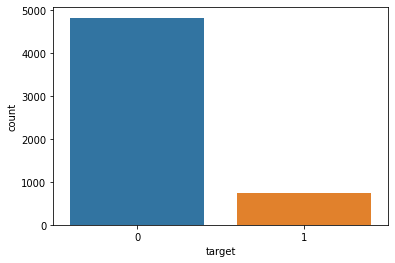

In [13]:
sns.countplot(data['target'])

In [14]:
data.duplicated().sum()

403

In [15]:
data.drop_duplicates(inplace=True)

In [16]:
data.duplicated().sum()

0

In [17]:
data.isnull().sum()

target    0
text      0
dtype: int64

In [18]:
data.shape

(5169, 2)

In [19]:
5728 - 33

5695

c:\Users\Preeti\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='target', ylabel='count'>

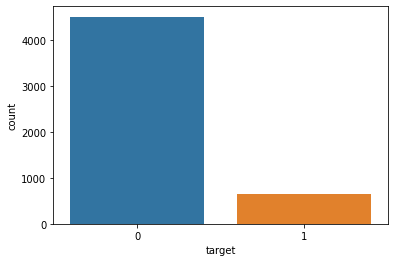

In [20]:
sns.countplot(data['target'])

In [21]:
data['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

# Separate in X and Y

In [22]:
X = data['text'].values
y = data['target'].values

In [23]:
y

array([0, 0, 1, ..., 0, 0, 0])

# Train - Test split

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2 , random_state= 0)

In [25]:
X_train.shape

(4135,)

In [26]:
X_test.shape

(1034,)

In [27]:
y_train.shape

(4135,)

In [28]:
y_test.shape

(1034,)

# Preprocessing 

In [29]:
from sklearn.feature_extraction.text import CountVectorizer

In [30]:
cv = CountVectorizer()


# Training by ML Algorithm

In [31]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
nb = MultinomialNB()

In [32]:
pipe = make_pipeline(cv, nb)

In [33]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('countvectorizer', CountVectorizer()),
                ('multinomialnb', MultinomialNB())])

In [34]:
y_pred = pipe.predict(X_test)

In [35]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, y_test)

0.9816247582205029

In [36]:
email = ['Hey i am Elon Musk. Get a brand new car from Tesla']
pipe.predict(email)

array([0])

In [37]:
import pickle
pickle.dump(pipe, open("Naive_model.pkl",'wb'))